1) Filter the data to include only weekdays (Monday to Friday) and plot a line graph showing the pedestrian counts for each day of the week.

2) Track pedestrian counts on the Brooklyn Bridge for the year 2019 and analyze how different weather conditions influence pedestrian activity in that year. Sort the pedestrian count data by weather summary to identify any correlations( with a correlation matrix) between weather patterns and pedestrian counts for the selected year.

3) Implement a custom function to categorize time of day into morning, afternoon, evening, and night, and create a new column in the DataFrame to store these categories. Use this new column to analyze pedestrian activity patterns throughout the day.

In [14]:
pip install pandas


[notice] A new release of pip is available: 23.1.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [15]:
pip install matplotlib


[notice] A new release of pip is available: 23.1.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [16]:
pip install seaborn


[notice] A new release of pip is available: 23.1.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
df = pd.read_csv('/Users/linzeru/Downloads/Brooklyn_Bridge_Automated_Pedestrian_Counts_Demonstration_Project.csv')

In [20]:
df

,hour_beginning,location,Pedestrians,Towards Manhattan,Towards Brooklyn,weather_summary,temperature,precipitation,lat,long,events,Location1
0,04/30/2019 12:00:00 AM,Brooklyn Bridge,3,3,0,NaN,NaN,NaN,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
1,12/31/2019 10:00:00 PM,Brooklyn Bridge,10,9,1,cloudy,42.0,0.0005,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
2,12/31/2019 11:00:00 PM,Brooklyn Bridge,2,0,2,cloudy,42.0,0.0004,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
3,12/31/2019 09:00:00 PM,Brooklyn Bridge,12,0,12,cloudy,42.0,0.0036,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
4,04/01/2019 03:00:00 AM,Brooklyn Bridge,1,0,1,clear-night,36.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
...,...,...,...,...,...,...,...,...,...,...,...,...
16052,06/22/2018 04:00:00 AM,Brooklyn Bridge,7,4,3,partly-cloudy-night,67.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
16053,07/19/2018 06:00:00 AM,Brooklyn Bridge,192,89,103,clear-day,65.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
16054,06/16/2018 04:00:00 PM,Brooklyn Bridge,2623,1161,1462,clear-day,82.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
16055,07/24/2018 06:00:00 PM,Brooklyn Bridge,2016,1069,947,partly-cloudy-day,80.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"


/var/folders/m6/mrtd3jvs66x_kcgcz41tx9140000gn/T/ipykernel_75584/2572131681.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['hour_beginning'] = pd.to_datetime(df['hour_beginning'])


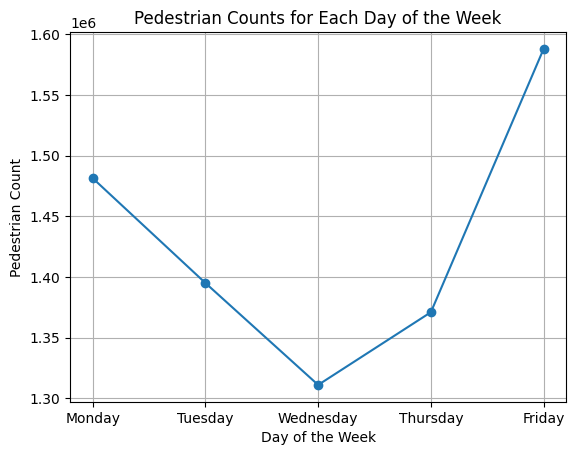

In [21]:
df['hour_beginning'] = pd.to_datetime(df['hour_beginning'])

df['day_of_week'] = df['hour_beginning'].dt.dayofweek

weekdays_data = df[df['day_of_week'] < 5]

pedestrian_counts_by_day = weekdays_data.groupby('day_of_week')['Pedestrians'].sum()

days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']

plt.plot(days_of_week, pedestrian_counts_by_day.values, marker='o') 
plt.xlabel('Day of the Week')
plt.ylabel('Pedestrian Count')
plt.title('Pedestrian Counts for Each Day of the Week')
plt.grid(True)
plt.show()

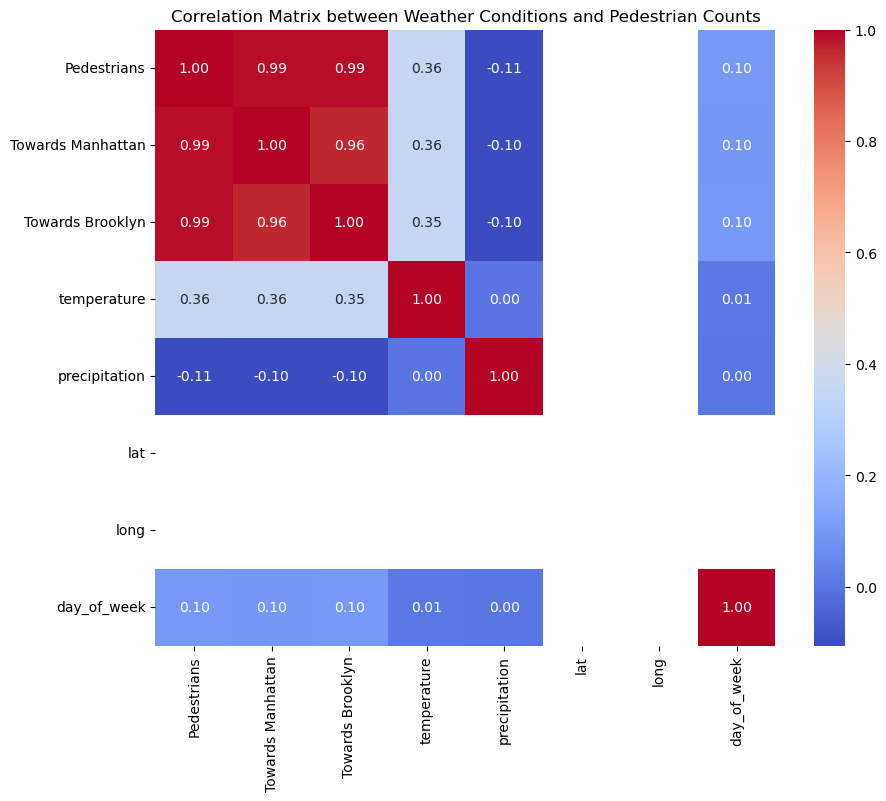

In [ ]:
dataset_2019 = df[df['hour_beginning'].dt.year == 2019]
sorted_data = dataset_2019.sort_values(by='weather_summary')
numeric_columns = sorted_data.select_dtypes(include=['number']).columns
correlation_matrix = sorted_data[numeric_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix between Weather Conditions and Pedestrian Counts')
plt.show()

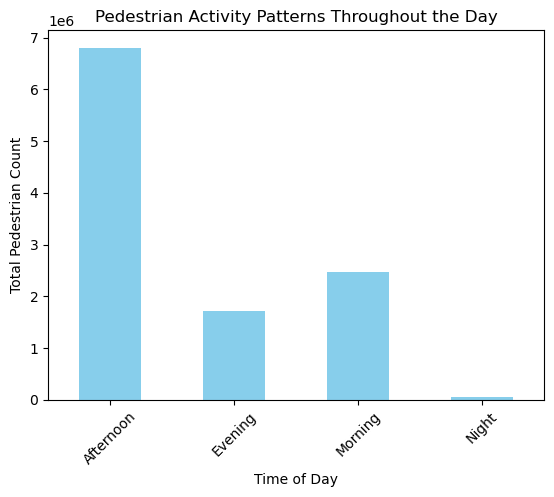

In [ ]:
def categorize_time_of_day(hour):
    if 0 <= hour < 6:
        return 'Night'
    elif 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    else:
        return 'Evening'

def categorize_time_of_day(hour):
    if 0 <= hour < 6:
        return 'Night'
    elif 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    else:
        return 'Evening'

df['time_of_day'] = df['hour_beginning'].apply(categorize_time_of_day)


pedestrian_counts_by_time_of_day = df.groupby('time_of_day')['Pedestrians'].sum()


pedestrian_counts_by_time_of_day.plot(kind='bar', color='skyblue')
plt.title('Pedestrian Activity Patterns Throughout the Day')
plt.xlabel('Time of Day')
plt.ylabel('Total Pedestrian Count')
plt.xticks(rotation=45)
plt.show()